# optimization methods

## minimum search

In [1]:
def minimumsearch(f, a, b, steps):
    """lo, hi = minimumsearch(f, a, b, steps).
    Searches the interval (a,b) in a number of steps for
    the bounds (lo,hi) of the minima of f(x).
    """
    if steps < 2:
        steps = 2
    h = (b - a) / steps
    lo = a
    md = a + h
    f_lo = f(lo)
    f_md = f(md)
    for step in range(2, steps + 1):
        hi = a + h * step # md + h
        f_hi = f(hi)
        if f_md < f_lo and f_md < f_hi:
            yield lo, hi
        lo, md, f_lo, f_md = md, hi, f_md, f_hi

#### minimum plotting

0.3400000000000001 < 0.36787944117144233 < 0.3800000000000001


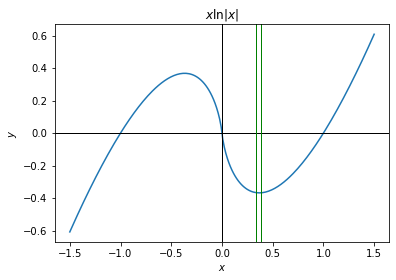

In [2]:
# Example: Minimize x*ln|x|
from math import log
func = lambda x: x * log(abs(x)) if x != 0.0 else 0.0     # the function, for now
dfunc = lambda x: 1.0 + log(abs(x))                       # the derivative, for later
solution = 0.3678794411714423216

for lo, hi in minimumsearch(func, -1.0, 1.0, 100):
    print(lo, '<', solution, '<', hi)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(-1.5, 1.5, 200)
ys = xs * np.log(np.abs(xs))

plt.plot(xs, ys, '-')
plt.axhline(y=0.0, linewidth=1, color='k'); plt.axvline(x=0.0, linewidth=1, color='k')
plt.axvline(x=lo, linewidth=1, color='g'); plt.axvline(x=hi, linewidth=1, color='g')
plt.title('$x\ln|x|$'); plt.xlabel('$x$'); plt.ylabel('$y$'); plt.show()

## golden section search

In [6]:
from math import sqrt
def golden_search(f, a, b, tol=...):
    """minimum = golden_search(f, a, b, tol=...).
    Finds a minimum of the function f using golden
    section search, starting from bracketing values
    a and b and ending when |b-a| < tol.
    """
    factor = (3 - sqrt(5))/2
    x1 = a + factor * (b-a)
    x2 = b - factor * (b-a)
    f1 = f(x1)
    f2 = f(x2)
    while abs(b-a) > tol:
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a+factor * (b-a)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b  - factor * (b-a)
            f2 = f(x2)
    return (a + b) / 2.0

#### plotting

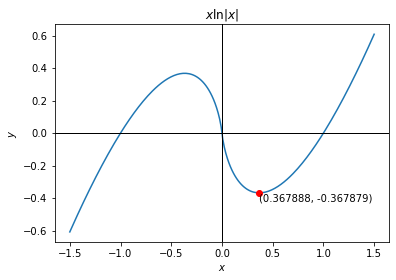

In [7]:
xmin = golden_search(func, lo, hi,1e-4)
ymin = func(xmin)

plt.plot(xs, ys, '-')
plt.plot(xmin, ymin, 'or')
plt.text(xmin, ymin, f'({xmin:.6f}, {ymin:.6f})', verticalalignment='top')
plt.axhline(y=0.0, linewidth=1, color='k'); plt.axvline(x=0.0, linewidth=1, color='k')
plt.title('$x\ln|x|$'); plt.xlabel('$x$'); plt.ylabel('$y$'); plt.show()

## gradient search

In [8]:
def gradient_search(df, x, gamma=1e-2, tol=1e-8):
    """minimum = gradient_search(df, x, gamma=..., tol=...).
    Finds a minimum of the function f with derivative df
    using gradient descent with learning rate gamma,
    starting from x and ending when |df| < tol.
    """
    slope = df(x)
    while abs(slope) > tol:
        x = x - gamma * slope
        slope = df(x)
    return x

## golden search

In [9]:
func = lambda x: 2*x**2-3*x**4
def golden_search(f, a, b, tol=...):
    """minimum = golden_search(f, a, b, tol=...).
    Finds a minimum of the function f using golden
    section search, starting from bracketing values
    a and b and ending when |b-a| < tol.
    """
    factor = (3 - sqrt(5))/2
    x1 = a + factor * (b-a)
    x2 = b - factor * (b-a)
    f1 = f(x1)
    f2 = f(x2)
    while abs(b-a) > tol:
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a+factor * (b-a)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b  - factor * (b-a)
            f2 = f(x2)
    return (a + b) / 2.0